In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

In [5]:
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
#checking for class distribution
class_distribution= df['Class'].value_counts()
class_distribution

Class
0    284315
1       492
Name: count, dtype: int64

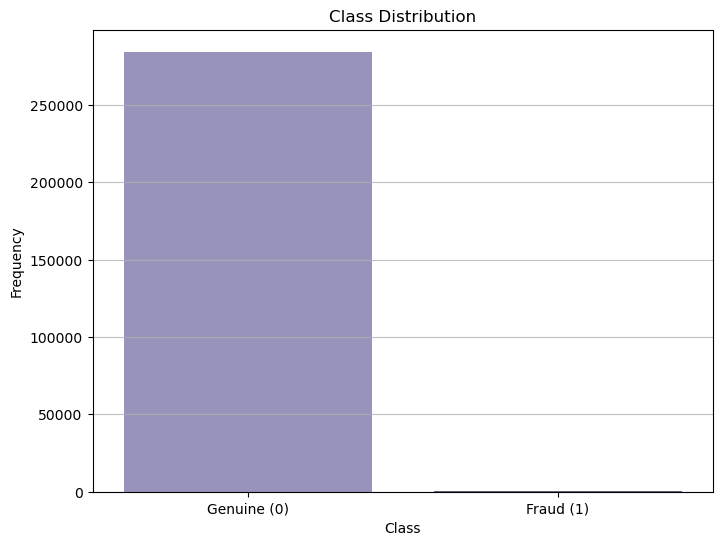

In [27]:
#plotting a bar graph to show class distribution
plt.figure(figsize=(8,6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='Purples_d')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Genuine (0)', 'Fraud (1)'])
plt.grid(True, axis='y', linestyle='-', alpha=0.8)
plt.show()

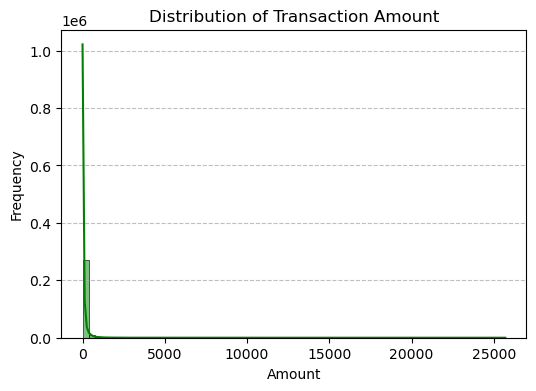

In [7]:
#Plotting a histogram to show the distribution of the transaction amount
plt.figure(figsize=(6, 4))
sns.histplot(df['Amount'], bins=70, kde=True, color='green')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.show()

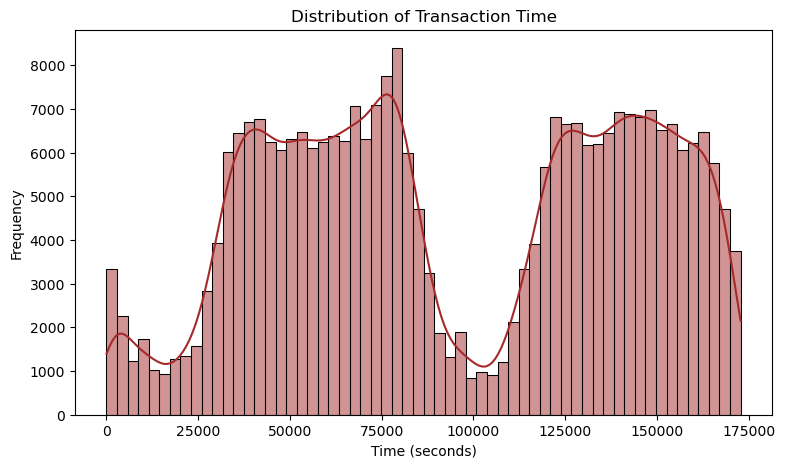

In [12]:
#plot showing distribution of transaction time
plt.figure(figsize=(9, 5))
sns.histplot(df['Time'], bins=60, kde=True, color='brown')
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

In [8]:
#getting the correlation
mymatrix=df.corr()
mymatrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,...,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
V2,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,...,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
V3,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,...,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
V4,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,...,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447
V5,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,...,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974
V6,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,...,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643
V7,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,...,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257
V8,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,...,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875
V9,-0.008660,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,...,3.040326e-12,-7.467526e-13,-1.011003e-12,8.579072e-13,-1.590341e-12,-7.723547e-13,2.428930e-12,-1.406856e-12,-0.044246,-0.097733


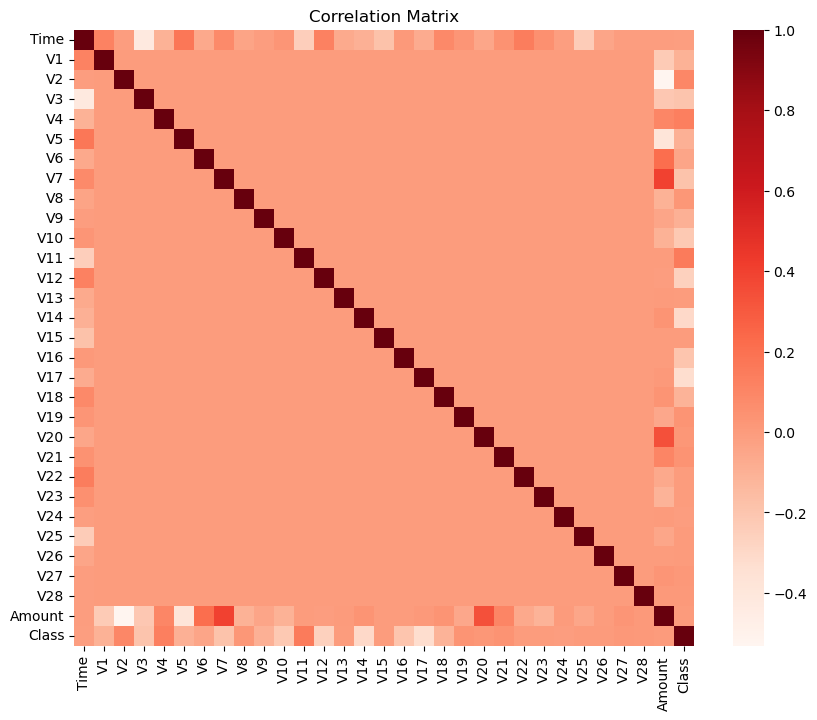

In [16]:
#plotting the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(mymatrix,cmap='Reds',annot=False)
plt.title('Correlation Matrix')
plt.show()

In [28]:
#checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [29]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [31]:
#feature scaling on Time & Amount
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

In [32]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [34]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-3.065637e-16,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,2.913952e-17,0.001727
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


In [36]:
#Split the data into training and test sets
X=df.drop('Class', axis=1)
Y=df['Class']
print(Y.shape)
print(X.shape)

(284807,)
(284807, 30)


In [37]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, random_state=46, test_size=0.3,) 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y.value_counts())
print(Y_train.value_counts())
print(Y_test.value_counts())

(199364, 30)
(85443, 30)
(199364,)
(85443,)
Class
0    284315
1       492
Name: count, dtype: int64
Class
0    199021
1       343
Name: count, dtype: int64
Class
0    85294
1      149
Name: count, dtype: int64


In [44]:
#initialize the model
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

In [46]:
#train the model
lr.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [50]:
#prediction
Y_predict_lr=lr.predict(X_test)
Y_predict_rf= rf.predict(X_test)
Y_predict_dt= dt.predict(X_test)

In [88]:
#Evaluating the models
lr_report=classification_report(Y_test, Y_predict_lr, target_names=['Not Fraud', 'Fraud'])
rf_report=classification_report(Y_test, Y_predict_rf, target_names=['Not Fraud', 'Fraud'])
dt_report=classification_report(Y_test, Y_predict_dt, target_names=['Not Fraud', 'Fraud'])

In [89]:
#getting ROC-AUC scores
lr_roc_auc= roc_auc_score(Y_test, lr.predict_proba(X_test)[:, 1])
rf_roc_auc= roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1])
dt_roc_auc= roc_auc_score(Y_test, dt.predict_proba(X_test)[:, 1])

In [91]:
print(lr_report, rf_report, dt_report, lr_roc_auc, rf_roc_auc, dt_roc_auc)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85294
       Fraud       0.85      0.66      0.75       149

    accuracy                           1.00     85443
   macro avg       0.93      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85294
       Fraud       0.94      0.81      0.87       149

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85294
       Fraud       0.72      0.76      0.74       149

    accuracy                           1.00     85443
   macro avg       0.86      0.88      0.87     85443
weighted avg       1.00      1.00      1.00     85443
 0.9936166308620967 

Resampling

In [60]:
#seperating the class by minority and majority
df_minority = df[df['Class'] == 1]
df_majority = df[df['Class'] == 0]

In [62]:
# Oversample the minority class
df_minority_oversampled= df_minority.sample(n=len(df_majority), replace=True, random_state=42)

In [63]:
#joining the oversamples minority to the majority class
df_balanced= pd.concat([df_majority, df_minority_oversampled])

In [64]:
#splitting the balanced data into training and test sets
X_balanced = df_balanced.drop('Class', axis=1)
y_balanced = df_balanced['Class']
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)

In [65]:
# Training the models on the balanced dataset
lr.fit(X_train_balanced, y_train_balanced)
dt.fit(X_train_balanced, y_train_balanced)
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier()

In [67]:
# Making predictions on the balanced test set
y_predict_lr_balanced = lr.predict(X_test_balanced)
y_predict_dt_balanced = dt.predict(X_test_balanced)
y_predict_rf_balanced = rf.predict(X_test_balanced)

In [92]:
# Evaluating the models on the balanced test set
lr_report_balanced = classification_report(y_test_balanced, y_predict_lr_balanced, target_names=['Not Fraud', 'Fraud'])
dt_report_balanced = classification_report(y_test_balanced, y_predict_dt_balanced, target_names=['Not Fraud', 'Fraud'])
rf_report_balanced = classification_report(y_test_balanced, y_predict_rf_balanced, target_names=['Not Fraud', 'Fraud'])

In [94]:
# Calculating ROC-AUC scores for the balanced test set
lr_roc_auc_balanced = roc_auc_score(y_test_balanced, lr.predict_proba(X_test_balanced)[:, 1])
dt_roc_auc_balanced = roc_auc_score(y_test_balanced, dt.predict_proba(X_test_balanced)[:, 1])
rf_roc_auc_balanced = roc_auc_score(y_test_balanced, rf.predict_proba(X_test_balanced)[:, 1])

In [96]:
# Displaying the classification reports and ROC-AUC scores for the balanced test set

In [97]:
print(lr_report_balanced,  dt_report_balanced,  rf_report_balanced,
      lr_roc_auc_balanced, dt_roc_auc_balanced, rf_roc_auc_balanced)

              precision    recall  f1-score   support

   Not Fraud       0.93      0.98      0.95     85295
       Fraud       0.98      0.92      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85295
       Fraud       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85295
       Fraud       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589
 0.9873711821540251 

In [98]:
# Calculate the ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_test_balanced, lr.predict_proba(X_test_balanced)[:, 1])
dt_fpr, dt_tpr, _ = roc_curve(y_test_balanced, dt.predict_proba(X_test_balanced)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test_balanced, rf.predict_proba(X_test_balanced)[:, 1])


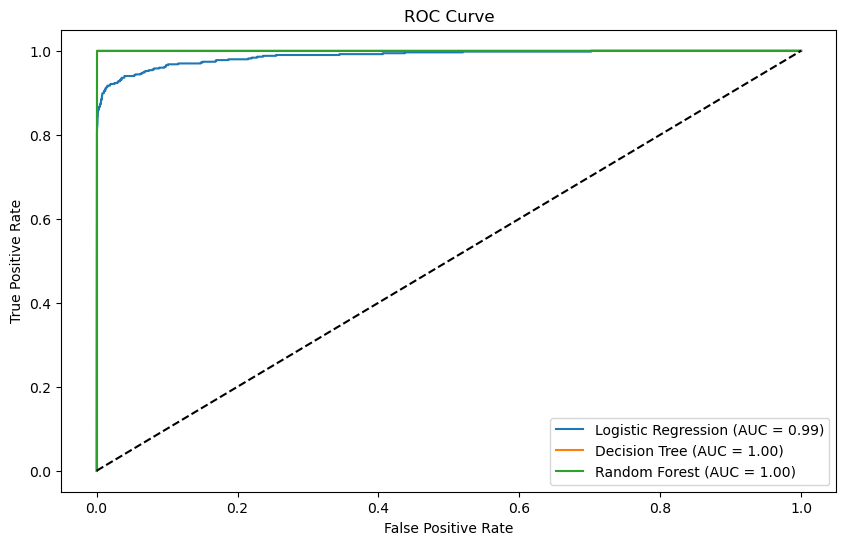

In [99]:
# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.2f})'.format(lr_roc_auc_balanced))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_roc_auc_balanced))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_roc_auc_balanced))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [103]:
print(lr_report_balanced)  #Logistic Regression
print(lr_roc_auc_balanced)

              precision    recall  f1-score   support

   Not Fraud       0.93      0.98      0.95     85295
       Fraud       0.98      0.92      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

0.9873711821540251


In [104]:
print(dt_report_balanced) # Decision Tree
print(dt_roc_auc_balanced)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85295
       Fraud       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

0.9997244856087696


In [105]:
print(rf_report_balanced) #Random Forest 
print(rf_roc_auc_balanced)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85295
       Fraud       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

1.0


Conclusion

During the Exploratory Data Analysis, the following was observed:
There is a significant class imbalance with a much higher number of non-fraudulent transactions compared to fraudulent ones. The majority of transactions are of smaller amounts, with a few large transactions. The features V1 to V28 show varying degrees of correlation with each other and the target variable Class.

Using StandardScaler, I performed a Feature Scaling on the ‘Time’ and ‘Amount’ columns to bring them in range of the Principal Component Analysis.


During the Model Building I split the data into training and test sets, then used three machine learning algorithms(Logistics Regression, Decision Tree and Random Forest) to build models. I evaluated these models based on accuracy, precision, recall, F1-score, and AUC-ROC.

During the Model Evaluation, I observed that all the models had an accuracy of nearly 100% because they were correctly predicting the majority class (non-fraud). However, they did not predict the fraudulent transactions with the same accuracy, as indicated by the precision and recall results.

To effectively detect the fraudulent transactions, I applied the Resampling technique to manually Oversample the Minority Class to get a more balanced dataset for retraining and evaluating the models. This approach led to excellent performance for all evaluated models, with perfect precision, recall, and F1-scores for both classes in the balanced test set.

Logistic Regression, Decision Tree, and Random Forest models all performed exceptionally well on the balanced dataset, achieving high accuracy and ROC-AUC scores. This indicates that the models can accurately distinguish between fraudulent and non-fraudulent transactions when trained on a balanced dataset.
Given the excellent performance of Logistic Regression, Decision Tree, and Random Forest models on the balanced dataset, any of these models can be considered for deployment. 
